In [1]:
# Import the dependencies
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations

lats = np.random.uniform(low = -90, high = 90, size = 500)

lngs = np.random.uniform(low = -180, high = 180, size = 500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [3]:
# Add the latitudes and longitudes to a list

coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

281

In [6]:
# Import requests library
import requests 

# Import weather api
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key



In [8]:
# Import the time library and the datetime module from the datetime library
import time

from datetime import datetime

In [9]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval      ")
print("------------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | gisborne
Processing Record 3 of Set 1 | khatanga
Processing Record 4 of Set 1 | aketi
Processing Record 5 of Set 1 | hami
Processing Record 6 of Set 1 | ishigaki
Processing Record 7 of Set 1 | hopewell
Processing Record 8 of Set 1 | krasnoselkup
Processing Record 9 of Set 1 | mikkeli
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | kamenka
Processing Record 14 of Set 1 | marcona
City not found. Skipping...
Processing Record 15 of Set 1 | sinnamary
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | coihaique
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 21 of Set 1 | vanimo
Processing Record 22 of Set 1 | l

Processing Record 37 of Set 4 | santa ines
Processing Record 38 of Set 4 | udachnyy
Processing Record 39 of Set 4 | ourossogui
Processing Record 40 of Set 4 | haibowan
City not found. Skipping...
Processing Record 41 of Set 4 | saint-leu
Processing Record 42 of Set 4 | mar del plata
Processing Record 43 of Set 4 | reconquista
Processing Record 44 of Set 4 | pedernales
Processing Record 45 of Set 4 | lasa
Processing Record 46 of Set 4 | nacogdoches
Processing Record 47 of Set 4 | gamba
Processing Record 48 of Set 4 | druzhba
Processing Record 49 of Set 4 | boyolangu
Processing Record 50 of Set 4 | flinders
Processing Record 1 of Set 5 | kamsack
Processing Record 2 of Set 5 | tual
Processing Record 3 of Set 5 | lata
Processing Record 4 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 5 of Set 5 | leoben
Processing Record 6 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 7 of Set 5 | bawku
Processing Record 8 of Set 5 | namibe
Processing Record 9 of S

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,77.27,68,13,23.67,PF,2022-04-27 23:58:58
1,Gisborne,-38.6533,178.0042,58.64,71,92,6.60,NZ,2022-04-27 23:57:19
2,Khatanga,71.9667,102.5000,22.14,85,100,15.97,RU,2022-04-27 23:58:58
3,Aketi,2.7388,23.7833,70.07,83,60,0.47,CD,2022-04-27 23:58:58
4,Hami,42.8000,93.4500,58.82,22,100,12.80,CN,2022-04-27 23:58:59
5,Ishigaki,24.3448,124.1572,80.73,89,20,12.66,JP,2022-04-27 23:58:59
6,Hopewell,37.3043,-77.2872,63.84,38,3,9.33,US,2022-04-27 23:58:59
7,Krasnoselkup,65.7000,82.4667,33.69,100,100,5.97,RU,2022-04-27 23:59:00
8,Mikkeli,61.6886,27.2723,25.14,86,0,2.30,FI,2022-04-27 23:59:00
9,Albany,42.6001,-73.9662,40.23,53,38,3.00,US,2022-04-27 23:55:20


In [24]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp",
                            "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df.head(20)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-04-27 23:58:58,-23.1203,-134.9692,77.27,68,13,23.67
1,Gisborne,NZ,2022-04-27 23:57:19,-38.6533,178.0042,58.64,71,92,6.60
2,Khatanga,RU,2022-04-27 23:58:58,71.9667,102.5000,22.14,85,100,15.97
3,Aketi,CD,2022-04-27 23:58:58,2.7388,23.7833,70.07,83,60,0.47
4,Hami,CN,2022-04-27 23:58:59,42.8000,93.4500,58.82,22,100,12.80
5,Ishigaki,JP,2022-04-27 23:58:59,24.3448,124.1572,80.73,89,20,12.66
6,Hopewell,US,2022-04-27 23:58:59,37.3043,-77.2872,63.84,38,3,9.33
7,Krasnoselkup,RU,2022-04-27 23:59:00,65.7000,82.4667,33.69,100,100,5.97
8,Mikkeli,FI,2022-04-27 23:59:00,61.6886,27.2723,25.14,86,0,2.30
9,Albany,US,2022-04-27 23:55:20,42.6001,-73.9662,40.23,53,38,3.00


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

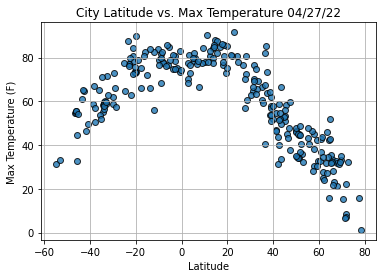

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

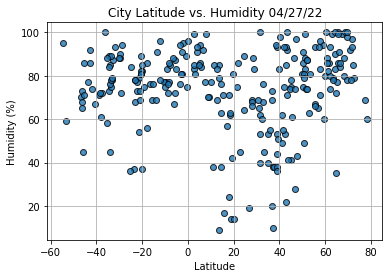

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


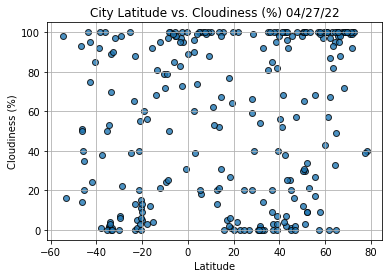

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

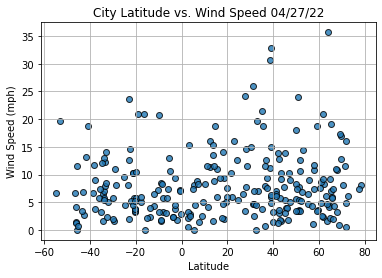

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                    Sinnamary
Country                        GF
Date          2022-04-27 23:59:02
Lat                        5.3833
Lng                        -52.95
Max Temp                    78.64
Humidity                       86
Cloudiness                    100
Wind Speed                   8.12
Name: 13, dtype: object

In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

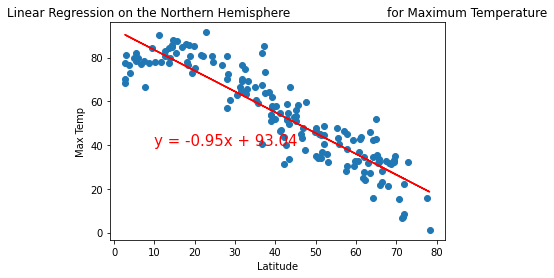

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


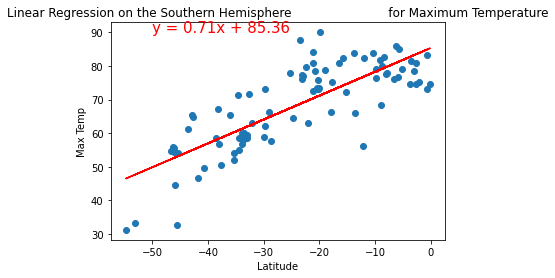

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

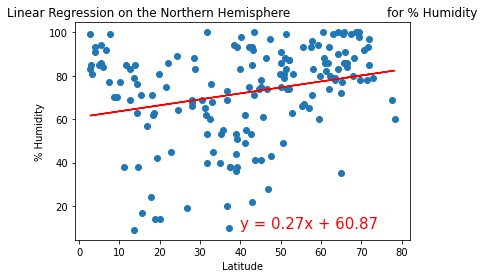

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


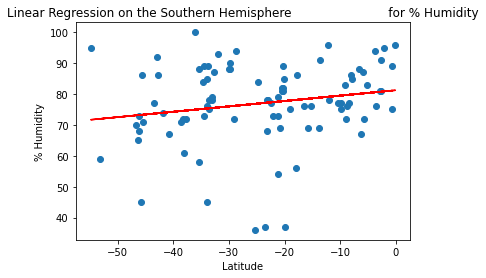

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))


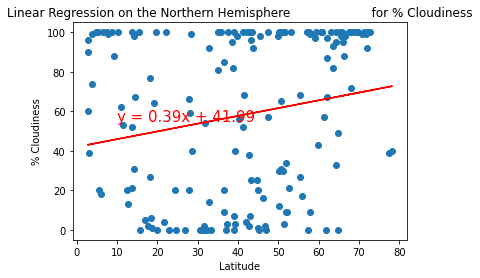

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

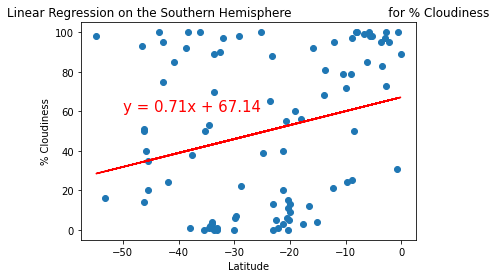

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

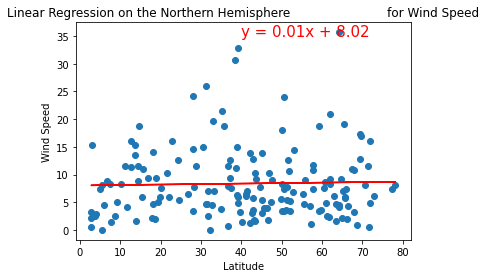

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

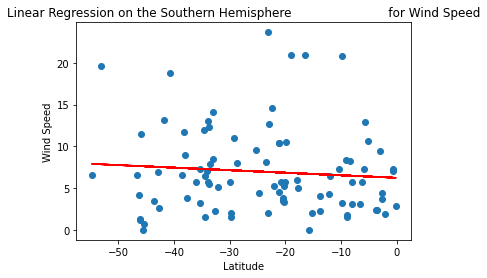

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))